#Step 1

## Q1 -Black-Scholes closed-form solution


### Price an ATM European call and put using a using the Black-Scholes closed-form solution.

In [72]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.stats as si

# Fix seed
np.random.seed(42)

In [73]:
# Parameters
S0 = 100       # Current stock price
K = 100        # Strike price (ATM)
r = 0.05       # Risk-free rate (5%)
sigma = 0.20   # Volatility (20%)
T = 3/12       # Time to maturity (3 months)
n = 100        # Number of steps
n_sim = 100000 # NNumber of simulations

In [74]:
# Black-Scholes Closed-Form Solution
def black_scholes(S0, K, r, sigma, T, option_type):
    d1 = (np.log(S0 / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return price

In [75]:
# Compute Black-Scholes prices
call_price_bs = black_scholes(S0, K, r, sigma, T, "call")
put_price_bs = black_scholes(S0, K, r, sigma, T, "put")

# Print results
print(f"Black-Scholes Call Price: {call_price_bs:.2f}")
print(f"Black-Scholes Put Price: {put_price_bs:.2f}")

Black-Scholes Call Price: 4.61
Black-Scholes Put Price: 3.37


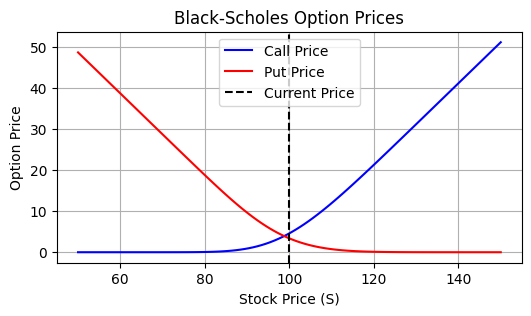

In [76]:
# Generate a range of stock prices
S_range = np.linspace(50, 150, 100)

# Compute option prices for different stock prices
call_prices = [black_scholes(S, K, r, sigma, T, "call") for S in S_range]
put_prices = [black_scholes(S, K, r, sigma, T, "put") for S in S_range]

# Plot the results
plt.figure(figsize=(6, 3))
plt.plot(S_range, call_prices, label="Call Price", color='blue')
plt.plot(S_range, put_prices, label="Put Price", color='red')
plt.axvline(S0, linestyle="--", color="black", label="Current Price")
plt.xlabel("Stock Price (S)")
plt.ylabel("Option Price")
plt.title("Black-Scholes Option Prices")
plt.legend()
plt.grid()
plt.show()

### Calulating Greek Delta on European call and put options

In [77]:
def black_scholes_delta(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    if option_type == "call":
        return si.norm.cdf(d1)  # Delta for call option
    elif option_type == "put":
        return si.norm.cdf(d1) - 1  # Delta for put option

In [78]:
# Compute Delta for call and put
delta_call = black_scholes_delta(S0, K, T, r, sigma, "call")
delta_put = black_scholes_delta(S0, K, T, r, sigma, "put")

print(f"Delta for European Call Option: {delta_call:.2f}")
print(f"Delta for European Put Option: {delta_put:.2f}")

Delta for European Call Option: 0.57
Delta for European Put Option: -0.43


We verify the result using the fact $call_{\Delta}-put_{\Delta} \approx 1$.

In [79]:
assert np.round(delta_call - delta_put) == np.round(1)

### compute the vega and analyze the impact of a 5% increase in volatility on call and put option prices:

In [80]:
def black_scholes_vega_cal(S0, K, T, r, sigma, option_type):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    # Vega calculation (same for call and put)
    vega = S0 * norm.pdf(d1) * np.sqrt(T)

    return price, vega

In [81]:
# Compute option prices and vega for original volatility (20%)
call_price_20, call_vega_20 = black_scholes_vega_cal(S0, K, T, r, sigma, 'call')
put_price_20, put_vega_20 =  black_scholes_vega_cal(S0, K, T, r, sigma, 'put')

# Compute option prices and vega for increased volatility (25%)
sigma_new = 0.25
call_price_25, call_vega_25 =  black_scholes_vega_cal(S0, K, T, r, sigma_new, 'call')
put_price_25, put_vega_25 =  black_scholes_vega_cal(S0, K, T, r, sigma_new, 'put')

# Results
print(f"Call Option Price (20% vol): {call_price_20:.2f}, Vega: {call_vega_20:.2f}")
print(f"Put Option Price (20% vol): {put_price_20:.2f}, Vega: {put_vega_20:.2f}")
print("\n")
print(f"Call Option Price (25% vol): {call_price_25:.2f}, Vega: {call_vega_25:.2f}")
print(f"Put Option Price (25% vol): {put_price_25:.2f}, Vega: {put_vega_25:.2f}")

# Change in prices due to 5% increase in volatility
call_price_change = call_price_25 - call_price_20
put_price_change = put_price_25 - put_price_20
print("\n")
print(f"Call Option Price Change: {call_price_change:.2f}")
print(f"Put Option Price Change: {put_price_change:.2f}")

Call Option Price (20% vol): 4.61, Vega: 19.64
Put Option Price (20% vol): 3.37, Vega: 19.64


Call Option Price (25% vol): 5.60, Vega: 19.69
Put Option Price (25% vol): 4.36, Vega: 19.69


Call Option Price Change: 0.98
Put Option Price Change: 0.98


In [82]:
volatilities = np.linspace(0.1, 0.5, 20)  # Range of volatility from 10% to 50%
call_prices = []
put_prices = []
vega_values = []

# Compute option prices and vega for different volatilities
for sigma in volatilities:
    call_price, call_vega = black_scholes_vega_cal(S0, K, T, r, sigma, 'call')
    put_price, put_vega = black_scholes_vega_cal(S0, K, T, r, sigma, 'put')

    call_prices.append(call_price)
    put_prices.append(put_price)
    vega_values.append(call_vega)  # Vega is same for call and put

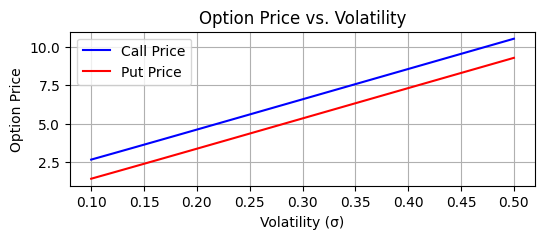

In [83]:
# Plot Option Prices vs. Volatility
plt.figure(figsize=(6, 2))
plt.plot(volatilities, call_prices, label="Call Price", color='blue')
plt.plot(volatilities, put_prices, label="Put Price", color='red')
plt.xlabel("Volatility (σ)")
plt.ylabel("Option Price")
plt.title("Option Price vs. Volatility")
plt.legend()
plt.grid()
plt.show()

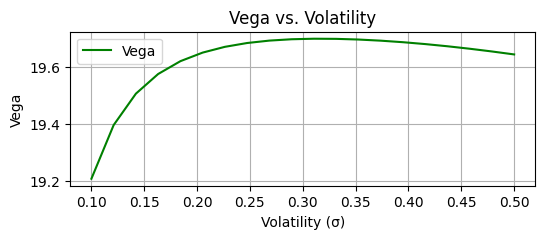

In [84]:
# Plot Vega vs. Volatility
plt.figure(figsize=(6, 2))
plt.plot(volatilities, vega_values, label="Vega", color='green')
plt.xlabel("Volatility (σ)")
plt.ylabel("Vega")
plt.title("Vega vs. Volatility")
plt.legend()
plt.grid()
plt.show()

##Q2 - Monte-Carlo methods under a general GBM equation

### Price an ATM European call and put using a Monte-Carlo methods under a general GBM equation.

https://www.columbia.edu/~mh2078/MonteCarlo/MCS_Greeks_MasterSlides.pdf

In [85]:
#Monte-Carlo simulation for European options
def monte_carlo_european_option(S0, K, r, sigma, T, option_type, n_sim=100000, n=100):
    dt = T / n
    discount_factor = np.exp(-r * T)

    #Simulate price path
    S_t = S0 * np.exp(np.cumsum(((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.randn(n_sim, n)), axis=1))
    S_T = S_t[:, -1] # Extract final price

    #Compute payoffs
    if option_type == 'call':
        payoffs = np.maximum(S_T - K, 0)
        indicator = (S_t > K)
        delta = np.exp(-r * T) * np.mean(indicator * (S_t / S0))

    else:
        payoffs = np.maximum(K - S_T, 0)
        indicator = (S_t < K)
        delta = -np.exp(-r * T) * np.mean(indicator * (S_t / S0))

    #Discounted expected payoff
    option_price = discount_factor * np.mean(payoffs)

    return option_price ,delta

In [86]:
# Compute Monte-Carlo prices and print results
call_price_mc,_ = monte_carlo_european_option(S0, K, r, sigma, T, 'call')
put_price_mc,_ = monte_carlo_european_option(S0, K, r, sigma, T, 'put')
print(f"MC European Call Price: {call_price_mc: .2f}, MC European Put Price: {put_price_mc: .2f}")

MC European Call Price:  10.42, MC European Put Price:  9.26


In [87]:
simulation_counts = np.arange(1000, 100000, 1000)

In [88]:
call_prices = []
put_prices = []

for i in simulation_counts:
    call_price,_ = monte_carlo_european_option(S0, K, r, sigma, T, 'call', n_sim=i)
    put_price,_ = monte_carlo_european_option(S0, K, r, sigma, T, 'put', n_sim=i)
    call_prices.append(call_price)
    put_prices.append(put_price)

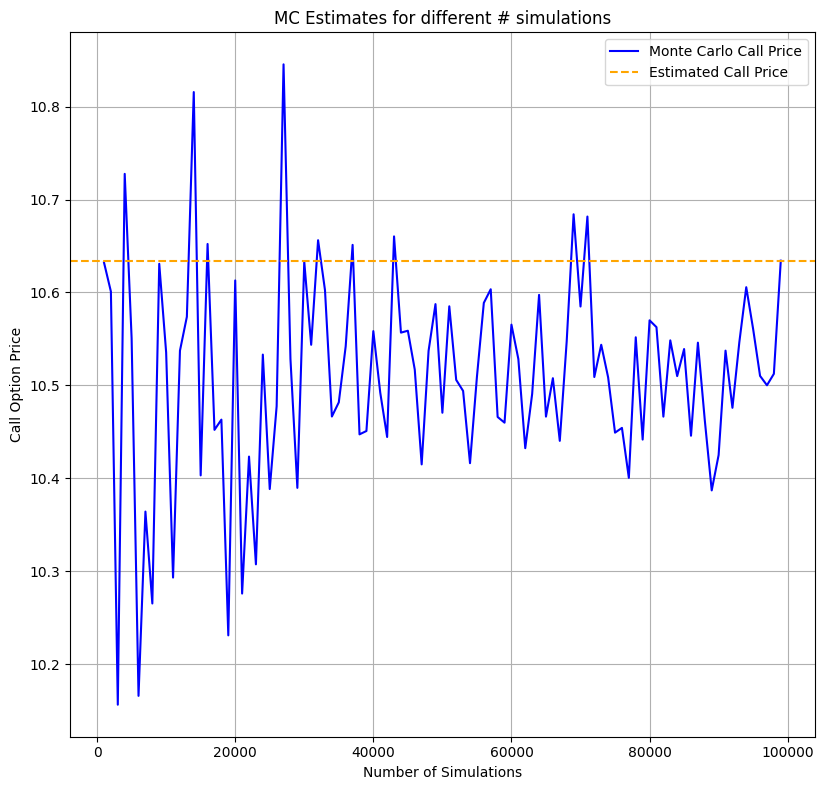

In [89]:
# Plot the results for MC call price
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(simulation_counts, call_prices, label='Monte Carlo Call Price', color='blue')
plt.axhline(y=call_prices[-1], color='orange', linestyle='--', label='Estimated Call Price')
plt.xlabel('Number of Simulations')
plt.ylabel('Call Option Price')
plt.title('MC Estimates for different # simulations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

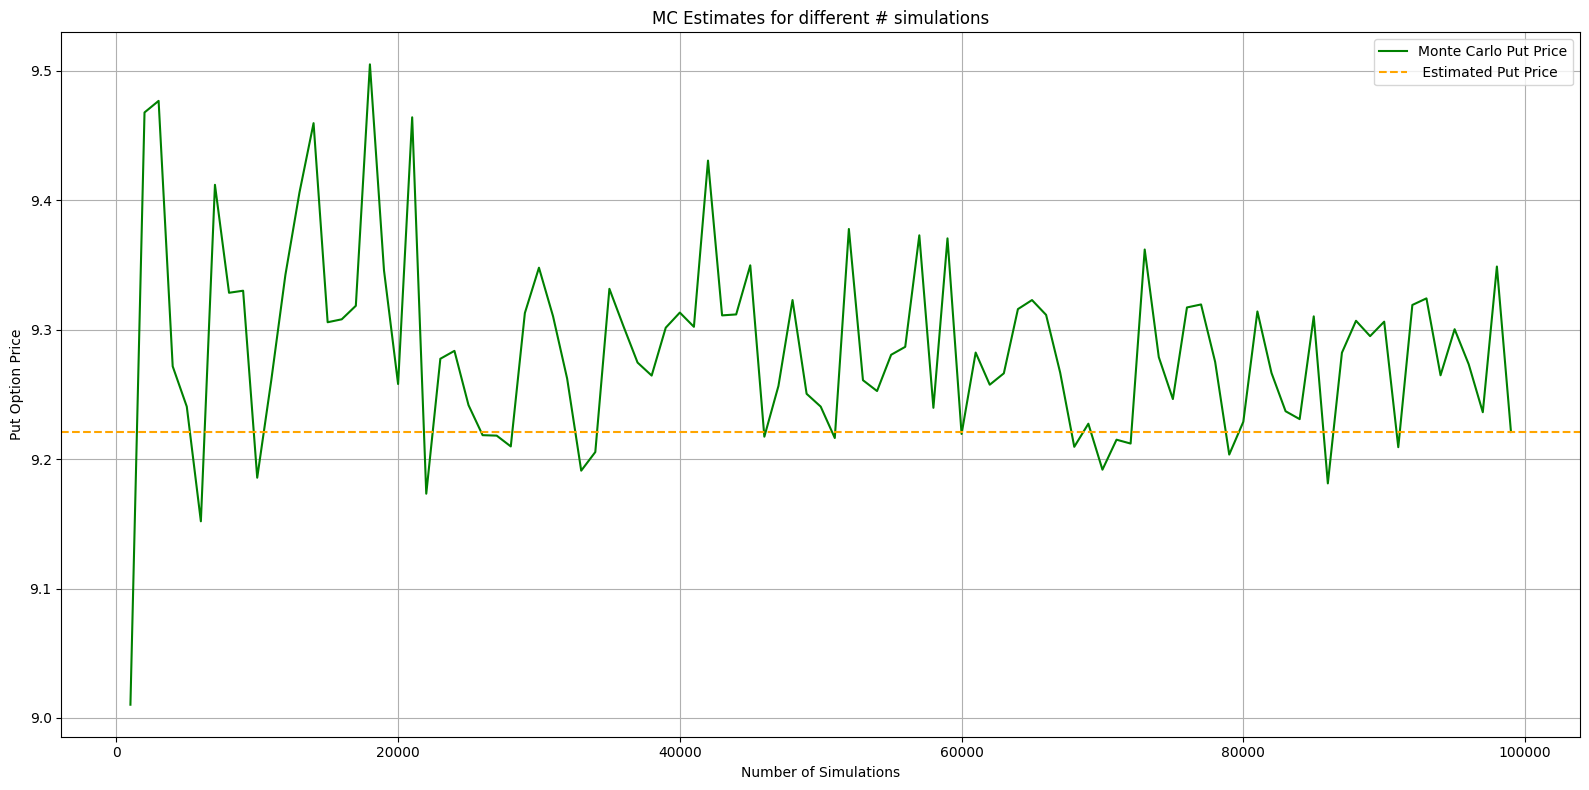

In [90]:
# Plot the results for MC put price
#plt.subplot(1, 2, 2)
plt.figure(figsize=(16, 8))
plt.plot(simulation_counts, put_prices, label='Monte Carlo Put Price', color='green')
plt.axhline(y=put_prices[-1], color='orange', linestyle='--', label=' Estimated Put Price')
plt.xlabel('Number of Simulations')
plt.ylabel('Put Option Price')
plt.title('MC Estimates for different # simulations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Calulating Greek Delta on European call and put options using Monte_Carlo

In [91]:
def compute_delta(S0, K, r, sigma, T, option_type, h=1):
    price_up,_ = monte_carlo_european_option(S0 + h, K, r, sigma, T, option_type)
    price_down,_ = monte_carlo_european_option(S0 - h, K, r, sigma, T, option_type)
    delta = (price_up - price_down) / (2 * h)
    return delta


In [92]:
# Compute Dela and print results
delta_call_mc = compute_delta(S0, K, r, sigma, T, 'call')
delta_put_mc = compute_delta(S0, K, r, sigma, T, 'put')

print(f"Call Delta: {delta_call:.2f}, Put Delta: {delta_put:.2f}")

Call Delta: 0.57, Put Delta: -0.43


###Compute vega

In [93]:
def compute_vega(S0, K, r, sigma, T, option_type, h=0.05):
    price_up, _ = monte_carlo_european_option(S0, K, r, sigma + h, T, option_type)
    price_down, _ = monte_carlo_european_option(S0, K, r, sigma - h, T, option_type)
    vega = (price_up - price_down) / (2 * h)
    return vega

In [94]:
# Compute vega and print results
vega_call = compute_vega(S0, K, r, sigma, T, 'call')
vega_put = compute_vega(S0, K, r, sigma, T, 'put')
print(f"Call Vega: {vega_call: .2f}, Put Vega: {vega_put: .2f}")

Call Vega:  19.86, Put Vega:  20.38


## Q3 - Put-Call parity

$C + Ke^{-rT} = P + S_0$

In [95]:
# Black-Scholes Results
assert np.round(call_price_bs + K*np.exp(-r*T)) == np.round(put_price_bs + S0)

In [96]:
# Monte-Carlo
assert np.round(call_price_mc + K*np.exp(-r*T)) == np.round(put_price_mc + S0)

Comment : The two approaches converge due to the law of large number, that is the more number of simulations we do the better the less estimation error we get. The slight differences in prices are from sampling errors in Monte-Carlo simulations.

# Step 2

## Q4 - Monte-Carlo method for American Call options

In [97]:
#Given parameters
S0 = 100
K = 100
r = 0.05
sigma = 0.20
T = 0.25
n_simulations = 1000000
n_steps = 100

https://berthine.github.io/doc/berthine_master-document.pdf

https://www.diva-portal.org/smash/get/diva2:301061/FULLTEXT01.pdf

In [98]:
# Least Squares Monte Carlo Method for American options
def monte_carlo_american_option(S0, K, r, sigma, T, option_type, n_simulations=100000, n_steps=90):
    dt = T / n_steps
    discount_factor = np.exp(-r * T)
    order = 2

    #Simulate price path
    S_T = S0 * np.exp(np.cumsum(((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.randn(n_simulations, n_steps)), axis=1))
    #S_T = S_T[:, -1] # Extract final price

    #Compute payoffs
    if option_type == 'call':
        payoffs = np.maximum(S_T[:, -1]  - K, 0)
    else:
        payoffs = np.maximum(K - S_T[:, -1] , 0)


    for i in range(n_steps-1,0,-1):
      in_the_money = (S_T[:,i] > K) if option_type == 'call' else (S_T[:,i] < K)
      X = S_T[in_the_money,i]
      Y = payoffs[in_the_money] * discount_factor

      A = np.vstack([np.ones_like(X), X, X**2]).T
      # least square
      beta = np.linalg.lstsq(A, Y, rcond=None)[0]
      continuation_value = A @ beta

      #payoff from early exercise
      early_exercise = (S_T[:,i] - K) if option_type == 'call' else (K - S_T[:,i])
      #update payoffs where early exercise is optimal
      early_exercise_in_money = early_exercise[in_the_money]
      payoffs[in_the_money] = np.where(early_exercise_in_money > continuation_value,
                                      early_exercise_in_money,
                                      Y/discount_factor)

    #Discounted expected payoff
    option_price = discount_factor * np.mean(payoffs)

    return option_price


In [99]:
call_price = monte_carlo_american_option(S0, K, r, sigma, T, 'call')
print(f"American Call Price: {call_price: .2f}")

American Call Price:  4.40


## Q5 - Monte-Carlo method for American Put options

In [100]:
put_price = monte_carlo_american_option(S0, K, r, sigma, T, 'put')
print(f"American Put Price: {put_price: .2f}")

American Put Price:  3.43


Put call parity check

In [101]:
assert np.round(call_price + K*np.exp(-r*T)) == np.round(put_price + S0)

In [102]:
simulation_counts = np.arange(1000, 100000, 1000)

In [103]:
call_prices = []
put_prices = []

for n in simulation_counts:
    call_price = monte_carlo_american_option(S0, K, r, sigma, T, 'call', n_simulations=n)
    put_price = monte_carlo_american_option(S0, K, r, sigma, T, 'put', n_simulations=n)
    call_prices.append(call_price)
    put_prices.append(put_price)

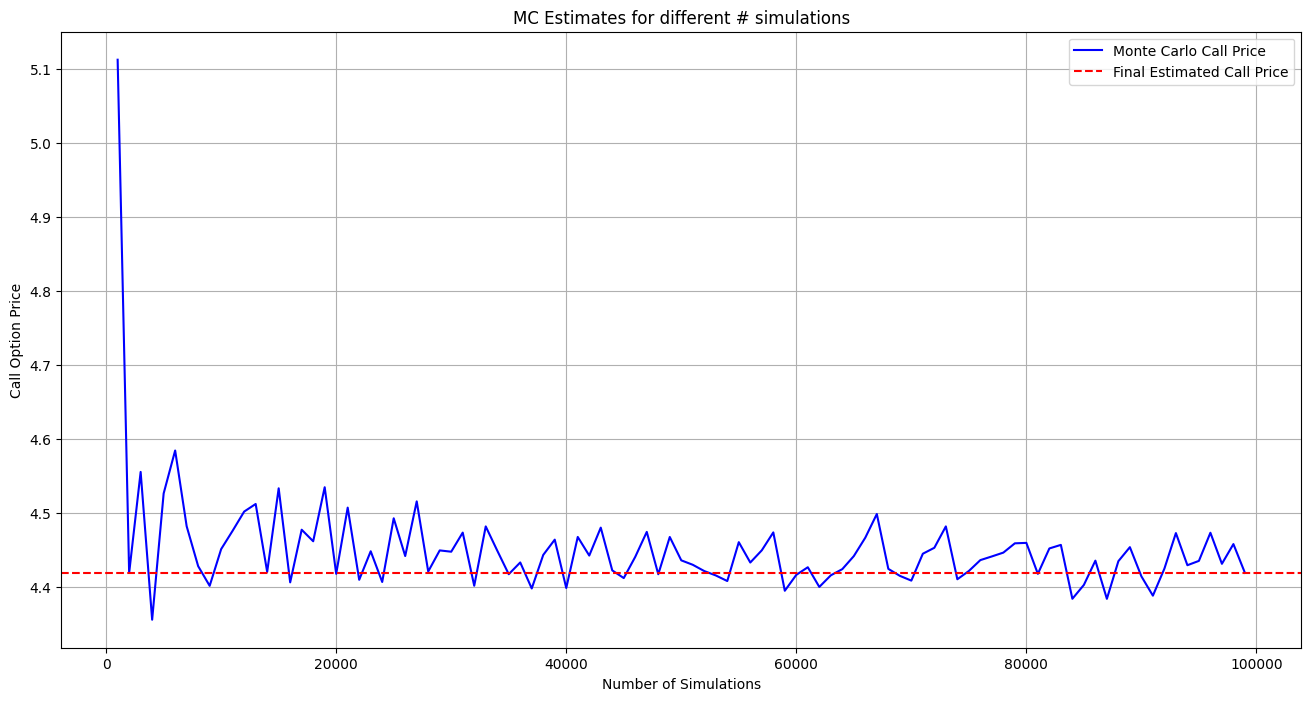

In [104]:
# Plot the results for call price
plt.figure(figsize=(16, 8))
plt.plot(simulation_counts, call_prices, label='Monte Carlo Call Price', color='blue')
plt.axhline(y=call_prices[-1], color='r', linestyle='--', label='Final Estimated Call Price')
plt.xlabel('Number of Simulations')
plt.ylabel('Call Option Price')
plt.title('MC Estimates for different # simulations')
plt.legend()
plt.grid(True)

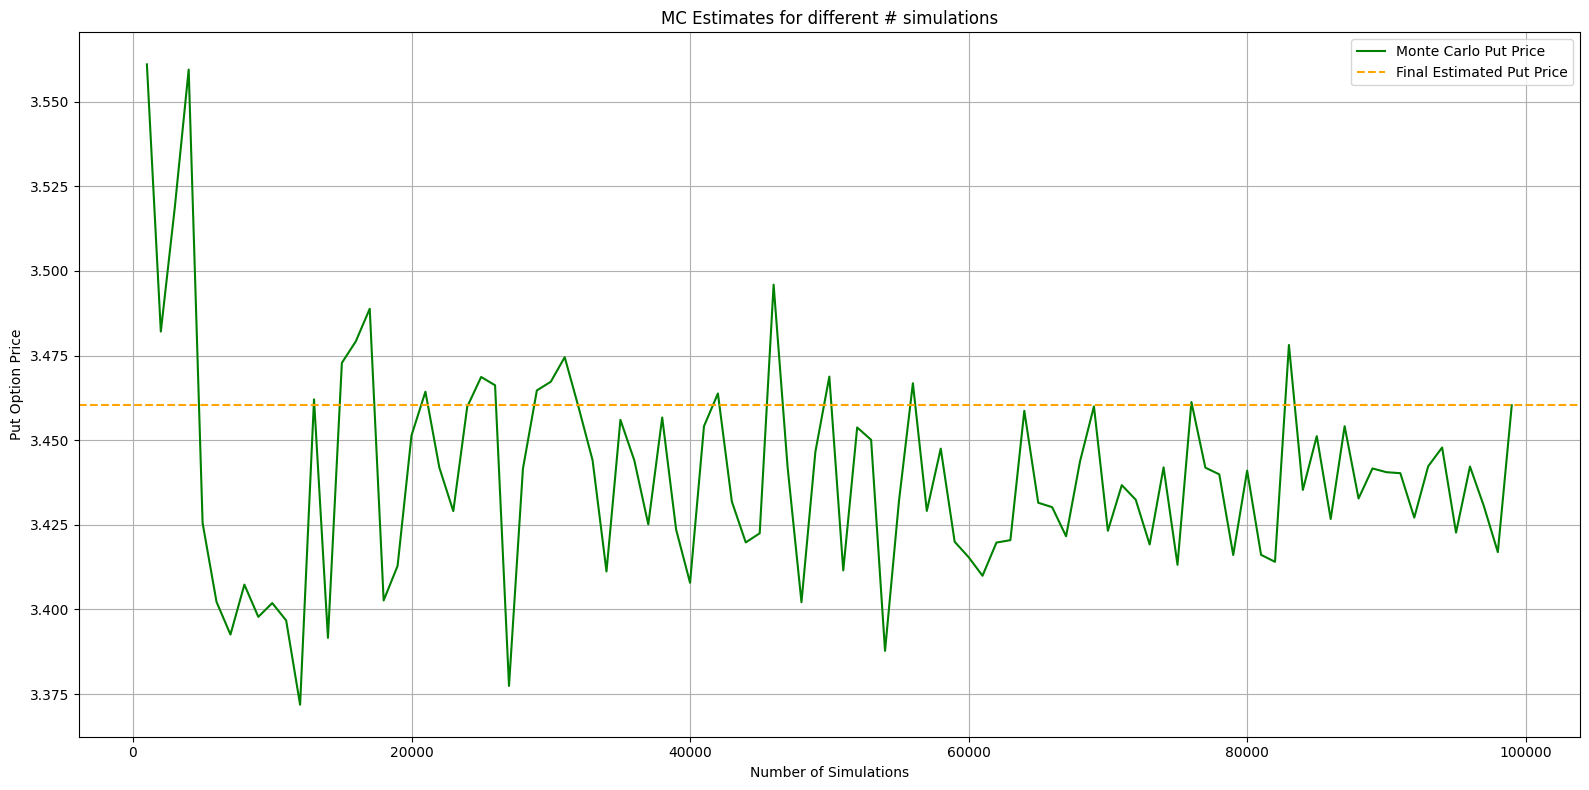

In [105]:
# Plot the results for put price
plt.figure(figsize=(16, 8))
#plt.subplot(1, 2, 2)
plt.plot(simulation_counts, put_prices, label='Monte Carlo Put Price', color='green')
plt.axhline(y=put_prices[-1], color='orange', linestyle='--', label='Final Estimated Put Price')
plt.xlabel('Number of Simulations')
plt.ylabel('Put Option Price')
plt.title('MC Estimates for different # simulations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Calculating Greek Delta on American Call Option

In [106]:
def compute_call_delta(S0, K, r, sigma, T, epsilon=0.01):
    call_plus = monte_carlo_american_option(S0 + epsilon, K, r, sigma, T, 'call')
    call_minus =monte_carlo_american_option(S0 - epsilon, K, r, sigma, T, 'call')

    delta_call = (call_plus - call_minus) / (2 * epsilon)

    return delta_call

In [107]:
# Compute Delta for American Call Option
delta = compute_call_delta(S0, K, r, sigma, T)
print(f"Delta of American Call Option: {delta:.2f}")

Delta of American Call Option: 2.60


### Calulating Greek Delta on American put option

In [108]:
def compute_delta(S0, K, r, sigma, T, epsilon=0.01):
    put_plus = monte_carlo_american_option(S0 + epsilon, K, r, sigma, T, 'put')
    put_minus = monte_carlo_american_option(S0 - epsilon, K, r, sigma, T, 'put')

    delta_put = (put_plus - put_minus) / (2 * epsilon)

    return delta_put

In [109]:
#print result
delta = compute_delta(S0, K, r, sigma, T)
print(f"American Delta Put: {delta:.2f}")

American Delta Put: -3.23


###Compute vega for Put option

In [110]:
def compute_vega(S0, K, r, sigma, T, option, delta_sigma=0.05):
    put_base = monte_carlo_american_option(S0, K, r, sigma, T, option)
    put_higher_sigma = monte_carlo_american_option(S0, K, r, sigma + delta_sigma, T, option)

    vega_put = (put_higher_sigma - put_base) / delta_sigma

    return vega_put

In [111]:
vega_put = compute_vega(S0, K, r, sigma, T, 'put')
print(f"Vega Put: {vega_put:.2f}")

Vega Put: 19.69


###Compute vega for call option

In [112]:
vega_call = compute_vega(S0, K, r, sigma, T, 'call')
print(f"Vega Call: {vega_call:.2f}")

Vega Call: 18.18


## Q6

In [113]:
moneyness = np.array([90,95,100,105,110])/100
K = (moneyness*S0)

In [114]:
american_call_prices = []
american_put_prices = []
for k in K:
  american_call_prices.append(monte_carlo_american_option(S0, k, r, sigma, T, 'call'))
  american_put_prices.append(monte_carlo_american_option(S0, k, r, sigma, T, 'put'))

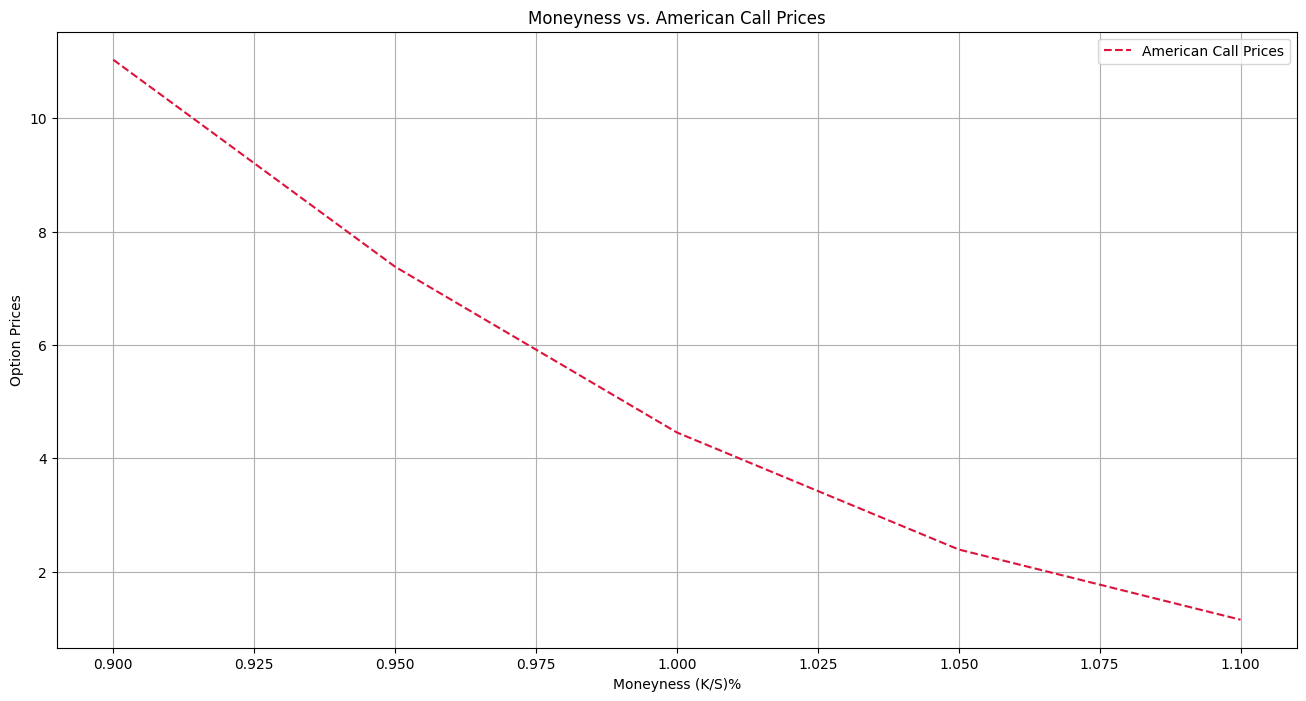

In [115]:
plt.figure(figsize=(16, 8))
plt.plot(moneyness, american_call_prices, label="American Call Prices",linestyle="--",color='crimson')
plt.xlabel("Moneyness (K/S)%")
plt.ylabel("Option Prices")
plt.title("Moneyness vs. American Call Prices")
plt.grid(True)
plt.legend()
plt.show()

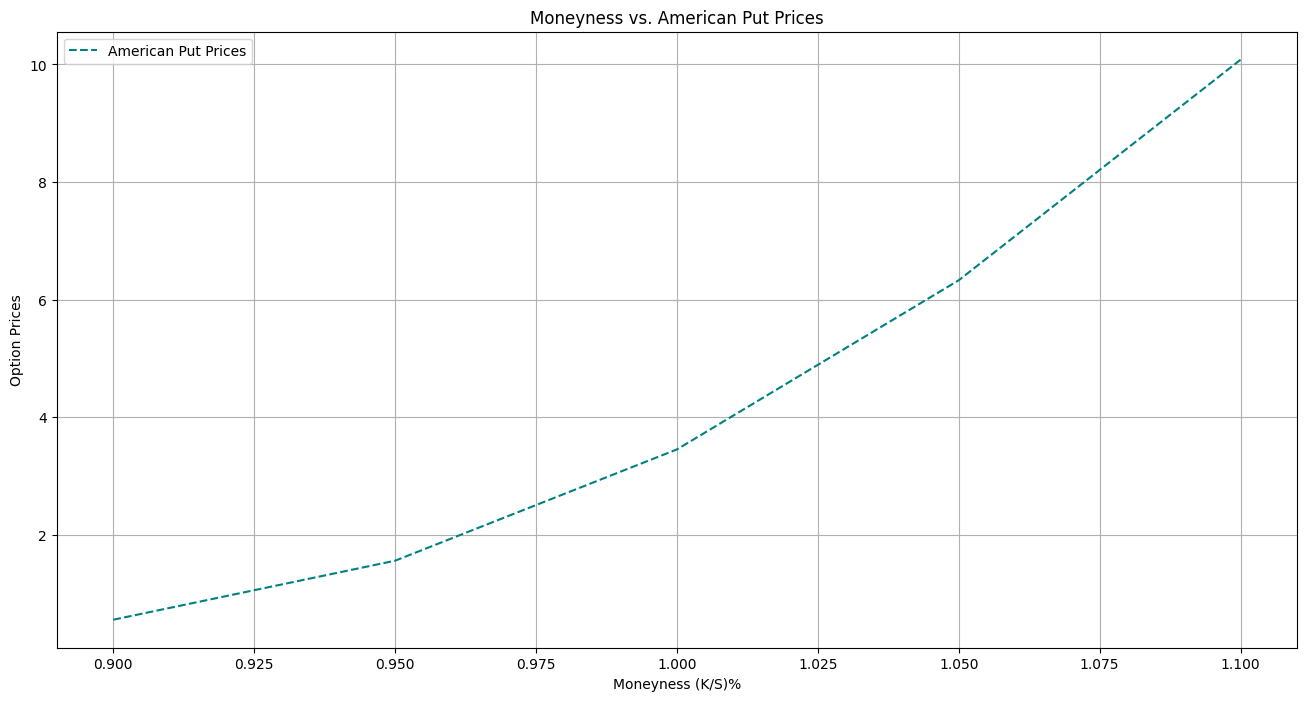

In [116]:
plt.figure(figsize=(16, 8))
plt.plot(moneyness, american_put_prices, label="American Put Prices",linestyle="--",color='teal')
plt.xlabel("Moneyness (K/S)%")
plt.ylabel("Option Prices")
plt.title("Moneyness vs. American Put Prices")
plt.grid(True)
plt.legend()
plt.show()


The value of the put option increases as the moneyness increases i.e the strike increases as it is deep ITM, in constrast it decreases when K decreases i.e deep OTM. This is the inverse for a call option where it decreases in value as K increases (OTM) and increases in value when K decreases (ITM). The call is worth more than the put ATM (K=S) due to cost of carry.

# Step 3

## Q7 European options under different levels of moneyness

In [125]:
# Parameters
S0 = 100  # Current stock price
r = 0.05  # Risk-free rate
sigma = 0.20  # Volatility
T = 3 / 12  # Time to maturity in years (3 months)

# Strike prices
K_call = 110  # 110% moneyness
K_put = 95  # 95% moneyness

# Black-Scholes formula for European call and put
def black_scholes(S0, K, r, sigma, T, option_type):
    d1 = (np.log(S0 / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        delta = norm.cdf(d1)
    elif option_type == "put":
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
        delta = norm.cdf(d1) - 1
    return price, delta

# Part (a): Price call and put options
call_price, call_delta = black_scholes(S0, K_call, r, sigma, T, "call")
put_price, put_delta = black_scholes(S0, K_put, r, sigma, T, "put")

print(f"European Call Option (K=110): Price = {call_price:.4f}, Delta = {call_delta:.4f}")
print(f"European Put Option (K=95): Price = {put_price:.4f}, Delta = {put_delta:.4f}")

# Part (b): Portfolio of buying call and put
portfolio_delta_b = call_delta + put_delta
print(f"Portfolio Delta (Buy Call + Buy Put): {portfolio_delta_b:.4f}")

# Delta-hedging for portfolio (b)
# To hedge, sell (portfolio_delta_b * 100) shares of the underlying asset
shares_to_sell_b = portfolio_delta_b * 100
print(f"Delta-Hedge for Portfolio (b): Sell {shares_to_sell_b:.4f} shares")

# Part (c): Portfolio of buying call and selling put
portfolio_delta_c = call_delta - put_delta
print(f"Portfolio Delta (Buy Call + Sell Put): {portfolio_delta_c:.4f}")

# Delta-hedging for portfolio (c)
# To hedge, sell (portfolio_delta_c * 100) shares of the underlying asset
shares_to_sell_c = portfolio_delta_c * 100
print(f"Delta-Hedge for Portfolio (c): Sell {shares_to_sell_c:.4f} shares")

European Call Option (K=110): Price = 1.1911, Delta = 0.2183
European Put Option (K=95): Price = 1.5343, Delta = -0.2457
Portfolio Delta (Buy Call + Buy Put): -0.0275
Delta-Hedge for Portfolio (b): Sell -2.7493 shares
Portfolio Delta (Buy Call + Sell Put): 0.4640
Delta-Hedge for Portfolio (c): Sell 46.4002 shares


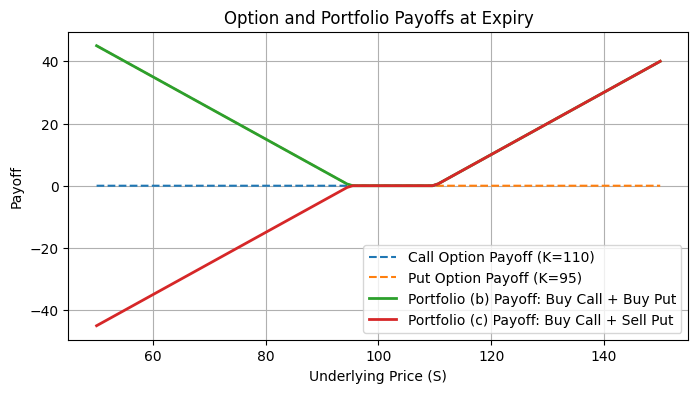

In [128]:
import matplotlib.pyplot as plt

# Function to calculate option payoffs at expiry
def payoff(S, K, option_type):
    if option_type == "call":
        return np.maximum(S - K, 0)
    elif option_type == "put":
        return np.maximum(K - S, 0)

# Underlying price range for plots
S_range = np.linspace(50, 150, 100)

# Payoffs at expiry
call_payoff = payoff(S_range, K_call, "call")
put_payoff = payoff(S_range, K_put, "put")
portfolio_b_payoff = call_payoff + put_payoff  # Buy call + buy put
portfolio_c_payoff = call_payoff - put_payoff  # Buy call + sell put

# Plot payoffs at expiry
plt.figure(figsize=(8, 4))
plt.plot(S_range, call_payoff, label="Call Option Payoff (K=110)", linestyle="--")
plt.plot(S_range, put_payoff, label="Put Option Payoff (K=95)", linestyle="--")
plt.plot(S_range, portfolio_b_payoff, label="Portfolio (b) Payoff: Buy Call + Buy Put", linewidth=2)
plt.plot(S_range, portfolio_c_payoff, label="Portfolio (c) Payoff: Buy Call + Sell Put", linewidth=2)
plt.title("Option and Portfolio Payoffs at Expiry")
plt.xlabel("Underlying Price (S)")
plt.ylabel("Payoff")
plt.legend()
plt.grid()
plt.show()

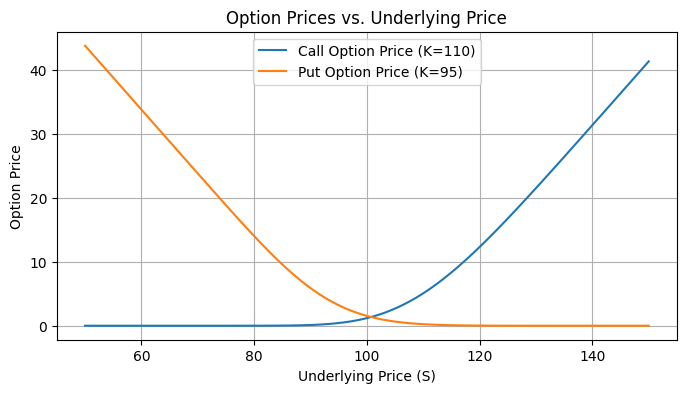

In [129]:
# Option prices vs. underlying price
call_prices = [black_scholes(S, K_call, r, sigma, T, "call")[0] for S in S_range]
put_prices = [black_scholes(S, K_put, r, sigma, T, "put")[0] for S in S_range]

plt.figure(figsize=(8, 4))
plt.plot(S_range, call_prices, label="Call Option Price (K=110)")
plt.plot(S_range, put_prices, label="Put Option Price (K=95)")
plt.title("Option Prices vs. Underlying Price")
plt.xlabel("Underlying Price (S)")
plt.ylabel("Option Price")
plt.legend()
plt.grid()
plt.show()

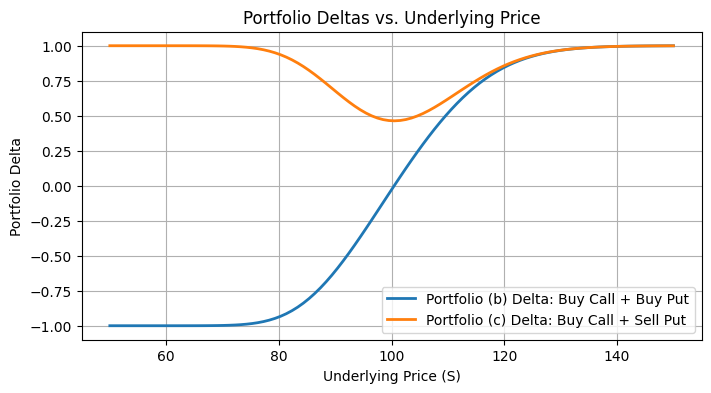

In [130]:
# Portfolio deltas vs. underlying price
portfolio_b_deltas = [black_scholes(S, K_call, r, sigma, T, "call")[1] + black_scholes(S, K_put, r, sigma, T, "put")[1] for S in S_range]
portfolio_c_deltas = [black_scholes(S, K_call, r, sigma, T, "call")[1] - black_scholes(S, K_put, r, sigma, T, "put")[1] for S in S_range]

plt.figure(figsize=(8, 4))
plt.plot(S_range, portfolio_b_deltas, label="Portfolio (b) Delta: Buy Call + Buy Put", linewidth=2)
plt.plot(S_range, portfolio_c_deltas, label="Portfolio (c) Delta: Buy Call + Sell Put", linewidth=2)
plt.title("Portfolio Deltas vs. Underlying Price")
plt.xlabel("Underlying Price (S)")
plt.ylabel("Portfolio Delta")
plt.legend()
plt.grid()
plt.show()

##Q8 - Up-and-Out (UAO) barrier option

In [117]:
def simulate_asset_price(S0, r, sigma, T, n):
    dt = T / n
    Z = np.random.normal(0, 1, n)
    price_path = S0 * np.cumprod(np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z))
    return price_path

In [118]:
def monte_carlo_up_and_out(S0, K, b, r, sigma, T, n, m, option_type="call"):
    payoffs = []

    for _ in range(m):
        # Simulate asset price path
        price_path = simulate_asset_price(S0, r, sigma, T, n)

        # Check if barrier is breached
        if np.any(price_path >= b):
            payoff = 0  # Option is knocked out
        else:
            # Calculate payoff based on option type
            if option_type == "call":
                payoff = max(price_path[-1] - K, 0)  # UAO Call payoff
            elif option_type == "put":
                payoff = max(K - price_path[-1], 0)   # UAO Put payoff
            else:
                raise ValueError("Invalid option type. Use 'call' or 'put'.")

        # Discount payoff to present value
        discounted_payoff = payoff * np.exp(-r * T)
        payoffs.append(discounted_payoff)

    # Calculate option price as the average of discounted payoffs
    option_price = np.mean(payoffs)
    return option_price

In [119]:
# Given parameters
S0 = 120
K = 120   # ATM
barrier = 141   # Barrier level
r = 0.06
sigma = 0.30
T = 8/12
n = int(T * 252)  # Daily time steps
m = 100000  # Number of simulations

In [120]:
# Compute option price and print results
call_price_uao = monte_carlo_up_and_out(S0, K, barrier, r, sigma, T, n, m, option_type="call")
put_price_uao = monte_carlo_up_and_out(S0, K, barrier, r, sigma, T, n, m, option_type="put")

print(f"Up-and-Out Call Option Price: {call_price_uao:.2f}")
print(f"Up-and-Out Put Option Price: {put_price_uao:.2f}")

Up-and-Out Call Option Price: 0.69
Up-and-Out Put Option Price: 8.39


##Q9 - Up-and-In barrier (UAI) barrier option

In [121]:
def monte_carlo_up_and_in(S0, K, r, sigma, T, barrier, option_type='call', n_simulations=100_000, n_steps=90):

    dt = T / n_steps
    discount_factor = np.exp(-r * T)

    # Simulate paths
    S = S0 * np.exp(np.cumsum(((r - 0.5 * sigma **2) * dt + sigma * np.sqrt(dt) *
                              np.random.randn(n_simulations, n_steps)), axis=1))

    S = np.hstack((np.full((n_simulations, 1), S0), S))

    barrier_hit = np.any(S >= barrier, axis=1)

    # Calculate payoff (only valid if barrier is hit)
    if option_type.lower() == 'call':
        payoff = np.maximum(S[:, -1] - K, 0) * barrier_hit
    else:  # put
        payoff = np.maximum(K - S[:, -1], 0) * barrier_hit

    # Calculate option price
    option_price = discount_factor * np.mean(payoff)

    return option_price

a)

In [122]:
call_price_uai = monte_carlo_up_and_in(S0, K, r, sigma, T, barrier, option_type='call')
put_price_uai = monte_carlo_up_and_in(S0, K, r, sigma, T, barrier, option_type='put')

print(f"Up-and-In Barrier Call Price: {call_price_uai: .2f}")
print(f"Up-and-In Barrier Put Price: {put_price_uai: .2f}")

Up-and-In Barrier Call Price:  13.18
Up-and-In Barrier Put Price:  0.83


b)

In [123]:
call_price_mc,_ = monte_carlo_european_option(S0, K, r, sigma, T, 'call')
put_price_mc,_ = monte_carlo_european_option(S0, K, r, sigma, T, 'put')
print(f"European Call Price: {call_price_mc: .2f}")
print(f"European Put Price: {put_price_mc: .2f}")

European Call Price:  13.82
European Put Price:  9.24


c)

A vanilla option can be decomposed into an up-and-out and up-and-in barrier. $Vanilla option = up-and-out + up-and-in barrier$, we show this in the below calculation

In [124]:
assert np.round(call_price_mc) == np.round(call_price_uai + call_price_uao)
assert np.round(put_price_mc) == np.round(put_price_uai + put_price_uao)